**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [167]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt
import time



In [168]:

# TO DO: Explain shortly the gym environment

# Consider the robot model described in Barto and Sutton Example 3.2

In [169]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 1
beta = 1
r_wait = 0.5
r_search = 2.0

# We define a discrete environment with the corresponding transitions
def gen_ambient(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_search):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)

env = gen_ambient()

In [170]:
print(P[0][1])
print(env.P)

[(1, 0, 2.0, False), (0, 1, 2.0, False)]
{0: {0: [(1.0, 0, 0.5, False)], 1: [(1, 0, 2.0, False), (0, 1, 2.0, False)], 2: [(1, 0, 0, False)]}, 1: {0: [(1.0, 1, 0.5, False)], 1: [(1, 1, 2.0, False), (0, 0, -3.0, False)], 2: [(1.0, 0, 0.0, False)]}}


# Implement the random strategy for 20 steps

Define a random action and see what reward it produces


In [171]:
def random_strategy(env):
  tps1 = time.clock()
  
  totalReward = 0
  Reward = []
  CumuReward =[]
  observation = env.reset()
  #print('The initial obsevation is :',  observation, 'so we are in the state', states[observation])
  for i in range(20):
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)
    totalReward += reward
    Reward.append(reward)
    CumuReward.append(totalReward)
    #print('obsevation after step number ', i, 'is :',  observation, 'so we are in the state', states[observation],'The action taken is : ',  actions[action], ' and the reward  is: ', reward)
  tps2 = time.clock()
  timeConvergence = tps2 - tps1
  return (totalReward,timeConvergence, Reward, CumuReward)

totalReward , timeConvergence,Reward, CumuReward = random_strategy(env)

# Plot the global reward 

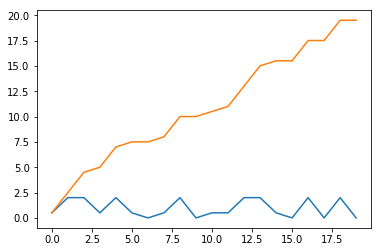

In [172]:
X = np.arange(20)
plt.figure(1)
plt.plot(X,Reward)
plt.plot(X,CumuReward)

# Compute directly the optimal value function for each state


In [173]:
for t in range(20):
    L_reward = []      
    for action in range(env.nA):
        observation, reward, done, info = env.step(action)
        L_reward.append(reward)  #The value of each action
    best_value = max(L_reward)
    best_action = np.argmax(np.asarray(L_reward))   # choose the action which gives the maximum value
    print("The optimal value for each state is {} and is get by taking the action {}".format(best_value,best_action))

The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.0 and is get by taking the action 1
The optimal value for each state is 2.

# Implement Value Iteration

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [174]:
def get_expected_reward(env,s,a):
  reward=0
  nb_possible_action = len(env.P[s][a])
  for i in range (nb_possible_action):
    reward += env.P[s][a][i][0]*env.P[s][a][i][2]
  return (reward/nb_possible_action)

get_expected_reward(env,0,0)

0.5

In [175]:
def optimal_value_function (env, theta=0.01, gamma=0.9):
  tps1 = time.clock()
  V_old = np.zeros(env.nS)
  V_new = np.zeros(env.nS)
  converge = False
  while not converge: 
    who_converge = 0
    V_old = np.copy(V_new)
    for s in range(env.nS):
      possible_value=[]
      for a in range(env.nA):
        value_for_a = get_expected_reward(env,s,a) + gamma*sum([ env.P[s][a][k][0]*V_old[env.P[s][a][k][1]] for k in range(len(P[s][a]))])
        possible_value.append(value_for_a)
      V_new[s]=max(possible_value)
      if (abs(V_new[s]-V_old[s])<theta):
        who_converge += 1
    if (who_converge == env.nS):
      converge = True
  tps2 = time.clock()
  timeConvergence = tps2 - tps1
  return (V_new,timeConvergence)


optimal_value_function(env, theta = 0.01, gamma = 0.9)
      


(array([9.91272036, 9.91272036]), 0.0008930000000013649)

# Implement policy iteration

First a policy evluation

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Then a policy improvement:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





In [176]:
def value_policy (policy, env, theta=0.01, gamma=0.9):
  V_old = np.zeros(env.nS)
  V_new = np.zeros(env.nS)
  converge = False
  while not converge: 
    who_converge = 0
    V_old = np.copy(V_new)
    for s in range(env.nS):
      a= np.argmax(policy[s,:])
      value_for_a = get_expected_reward(env,s,a) + gamma*sum([ env.P[s][a][k][0]*V_old[env.P[s][a][k][1]] for k in range(len(P[s][a]))])
      V_new[s]=value_for_a
      if (abs(V_new[s]-V_old[s])<theta):
        who_converge += 1
    if (who_converge == env.nS):
      converge = True
  return V_new

policy=np.array([[0,1,0],[0,1,0]])

value_policy(policy,env, theta = 0.01, gamma = 0.9)
      


array([9.91272036, 9.91272036])

In [177]:
def policy_improvement(env, value_policy=value_policy, gamma=0.9):
  tps1 = time.clock()
  list_policy=[]
  list_value=[]
  list_sum_value=[]
  for k in range (env.nA**env.nS):
    policy = np.zeros([env.nS,env.nA])
    for p in range (env.nS):
      policy[p][0]=0
      #f=max(2*k+p,k)
      if (p%2==0):
        j=k//env.nA
      else:
        j=k%env.nA
      policy[p][j]=1

    values=value_policy(policy,env)

    list_policy.append(policy)
    list_value.append(values)
    list_sum_value.append(np.sum(values))

  idx = np.argmax(np.array(list_sum_value))
  tps2 = time.clock()
  timeConvergence = tps2 - tps1
  
  return (list_policy[idx], list_value[idx],timeConvergence)

  
  



policy_improvement(env)[0]


array([[0., 1., 0.],
       [0., 1., 0.]])

# Using the 3 algorithms do the following experiments


In [178]:
def optimal_strategy(env):
  tps1 = time.clock()
  totalReward = 0
  Reward = []
  CumuReward =[]
  observation = env.reset()
  policy = policy_improvement(env)[0]
  #print('The initial obsevation is :',  observation, 'so we are in the state', states[observation])
  for i in range(20):
    action= np.argmax(policy[observation,:])
    #action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)
    totalReward += reward
    Reward.append(reward)
    CumuReward.append(totalReward)
    #print('obsevation after step number ', i, 'is :',  observation, 'so we are in the state', states[observation],'The action taken is : ',  actions[action], ' and the reward  is: ', reward)
  tps2 = time.clock()
  timeConvergence = tps2 - tps1
  return (totalReward, timeConvergence, Reward, CumuReward)


In [179]:
env = gen_ambient(alpha=1, beta=1, r_search=0.5, r_wait=2)
exp1 = gen_ambient(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = gen_ambient(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = gen_ambient(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)


# Compare the different strategies with the random one
# Compare the different strategies in terms of speed of convergence for the different scenarios
# What would you do if alpha and beta are unknown (and you dont know RL)? Try to implement something if you have time.


In [180]:
totalRewardRandom,timeConvergenceRandom = random_strategy(env)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(env)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(7.5, 0.000408000000000186)
(10.0, 0.005973000000000894)


In [181]:
totalRewardRandom,timeConvergenceRandom = random_strategy(exp1)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(exp1)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(8.5, 0.0004960000000018283)
(10.0, 0.006088999999999345)


In [182]:
totalRewardRandom,timeConvergenceRandom = random_strategy(exp2)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(exp2)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(8.5, 0.002192999999998335)
(10.0, 0.006596000000001823)


In [183]:
totalRewardRandom,timeConvergenceRandom = random_strategy(exp3)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(exp3)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(10.0, 0.0010290000000026112)
(10.0, 0.0060789999999997235)


In [184]:
totalRewardRandom,timeConvergenceRandom = random_strategy(exp4)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(exp4)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(7.5, 0.0011970000000012249)
(10.0, 0.005272999999998973)


In [185]:
totalRewardRandom,timeConvergenceRandom = random_strategy(exp5)[0:2]
totalRewardOptimal,timeConvergenceOptimal = optimal_strategy(exp5)[0:2]

print(totalRewardRandom,timeConvergenceRandom)
print(totalRewardOptimal,timeConvergenceOptimal)

(10.5, 0.0017149999999972465)
(10.0, 0.00629199999999841)


**Difference of speed of convergence**







In [186]:
#env

timeConvergence1 = optimal_value_function(env)[1]
timeConvergence2 = policy_improvement(env)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.0019700000000000273)
('policy improvement:', 0.004179999999998074)


In [187]:
#exp1

timeConvergence1 = optimal_value_function(exp1)[1]
timeConvergence2 = policy_improvement(exp1)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.0028849999999991383)
('policy improvement:', 0.004308000000001755)


In [188]:
#exp2

timeConvergence1 = optimal_value_function(exp2)[1]
timeConvergence2 = policy_improvement(exp2)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.004248000000000474)
('policy improvement:', 0.006061000000002537)


In [189]:
#exp3

timeConvergence1 = optimal_value_function(exp3)[1]
timeConvergence2 = policy_improvement(exp3)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.0013970000000007587)
('policy improvement:', 0.004709000000001851)


In [190]:
#exp4

timeConvergence1 = optimal_value_function(exp4)[1]
timeConvergence2 = policy_improvement(exp4)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.0022359999999999047)
('policy improvement:', 0.00513300000000072)


In [191]:
#exp5

timeConvergence1 = optimal_value_function(exp5)[1]
timeConvergence2 = policy_improvement(exp5)[2]

print('optimal value function:', timeConvergence1)
print('policy improvement:', timeConvergence2)

('optimal value function:', 0.0030420000000006553)
('policy improvement:', 0.006017000000003492)


The optimal value method seems to be twice faster than the policy improvement